<a href="https://colab.research.google.com/github/ycyoondev/ML-study/blob/master/211221_Face-Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=c58eda1f046371d185f66960b2fad4ccda2f8a3cde8bfbbbb4d7e2f0687df20e
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [4]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [12]:
image_path = '/gdrive/My Drive/Colab_Notebooks/ALML/ssafy/얼굴인식/face_sample2.jpg'

In [13]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [14]:
cnt = 0 # 얼굴 수
for (top, right, bottom, left) in face_locations:
  cnt += 1
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)
cnt

5

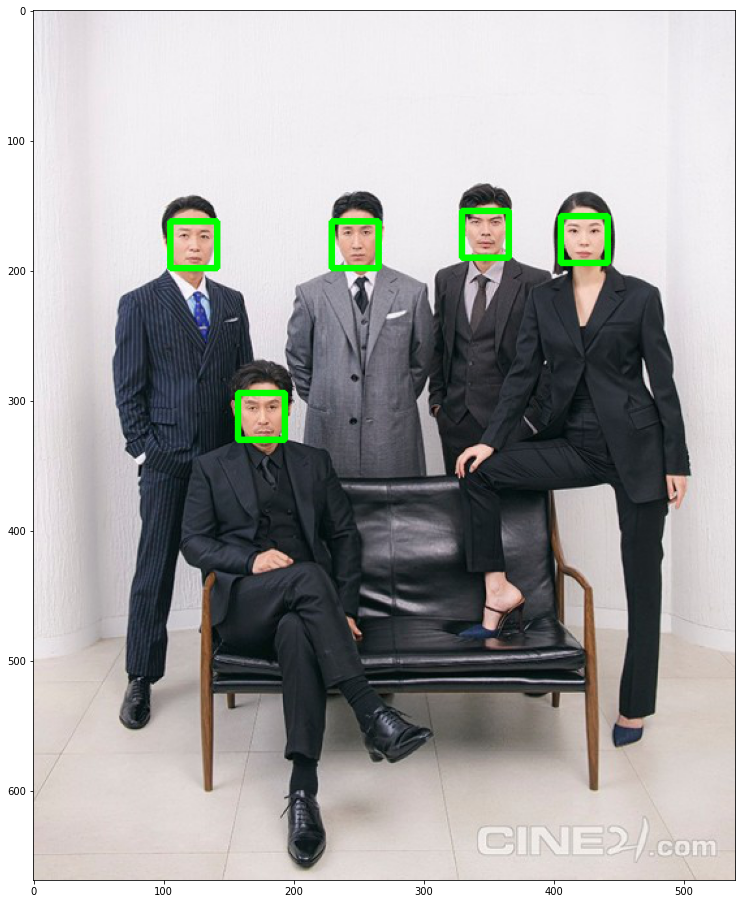

In [16]:
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [17]:
plt.rcParams["figure.figsize"] = (1, 1)

known_person_list = []
known_person_list.append(fr.load_image_file('/gdrive/My Drive/Colab_Notebooks/ALML/ssafy/얼굴인식/person1.jpg'))
known_person_list.append(fr.load_image_file('/gdrive/My Drive/Colab_Notebooks/ALML/ssafy/얼굴인식/person2.jpg'))
known_person_list.append(fr.load_image_file('/gdrive/My Drive/Colab_Notebooks/ALML/ssafy/얼굴인식/person3.jpg'))
known_person_list.append(fr.load_image_file('/gdrive/My Drive/Colab_Notebooks/ALML/ssafy/얼굴인식/person4.jpg'))

In [18]:
known_face_list = []
for person in known_person_list:
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  known_face_list.append(face_image)
known_face_list

[array([[[ 22,  27,  31],
         [ 23,  30,  36],
         [ 35,  42,  48],
         ...,
         [ 31,  32,  24],
         [ 28,  29,  21],
         [ 37,  38,  30]],
 
        [[ 29,  34,  38],
         [ 19,  26,  32],
         [ 35,  42,  48],
         ...,
         [ 26,  27,  19],
         [ 19,  20,  12],
         [ 29,  30,  22]],
 
        [[ 21,  29,  32],
         [ 24,  27,  32],
         [ 35,  38,  43],
         ...,
         [ 25,  25,  15],
         [ 43,  43,  33],
         [ 25,  25,  15]],
 
        ...,
 
        [[221, 237, 236],
         [218, 237, 235],
         [218, 237, 235],
         ...,
         [225, 241, 240],
         [225, 241, 240],
         [225, 241, 240]],
 
        [[221, 237, 236],
         [219, 238, 236],
         [219, 238, 236],
         ...,
         [225, 241, 240],
         [225, 241, 240],
         [225, 241, 240]],
 
        [[221, 237, 236],
         [220, 239, 237],
         [220, 239, 237],
         ...,
         [225, 241, 240],
  

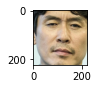

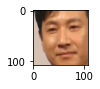

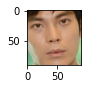

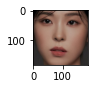

In [19]:
for face in known_face_list:
  plt.imshow(face)
  plt.show()

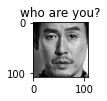

In [20]:
# 모르는 얼굴의 이미지 추출
unkown_person = fr.load_image_file('/gdrive/My Drive/Colab_Notebooks/ALML/ssafy/얼굴인식/unknown.jpg')
top, right, bottom, left = fr.face_locations(unkown_person)[0]
unknown_face = unkown_person[top:bottom, left:right]

plt.title("who are you?")
plt.imshow(unknown_face)
plt.show()

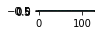

In [21]:
enc_unknown_face = fr.face_encodings(unknown_face)
plt.imshow(enc_unknown_face)
plt.show()

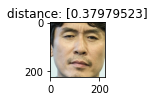

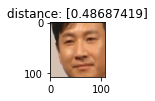

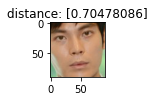

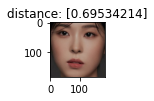

In [23]:
# 기존 사람과 비교
for face in known_face_list:
  enc_known_face = fr.face_encodings(face)
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0]) # 차이 비교
  plt.title('distance: ' + str(distance))
  plt.imshow(face)
  plt.show()